In [1]:
import input_data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist_images = input_data.read_data_sets("MNIST_data/", one_hot=False)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


train.next_batch(10) returns the first 10 images :

In [8]:
pixels, real_values = mnist_images.train.next_batch(10)

In [9]:
print "list of values loaded ", real_values

list of values loaded  [0 3 1 2 7 0 2 9 6 0]


In [31]:
example_to_visulize = 6
print "element N " + str(example_to_visulize+1) + " of the list plotted"

element N 7 of the list plotted


In [32]:
image = pixels[example_to_visulize]
image = np.reshape(image, [28,28])
plt.imshow(image)

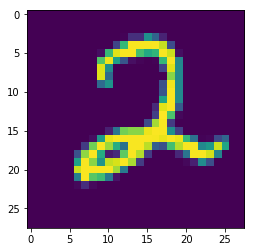

In [33]:
plt.show()

In [14]:
train_pixels, train_values = mnist_images.train.next_batch(100)

In [45]:
test_pixels, test_values = mnist_images.train.next_batch(10)

In [46]:
import tensorflow as tf
train_pixels_tensor = tf.placeholder("float", [None,784])
test_pixels_tensor = tf.placeholder("float", [784])

In [54]:
cost = tf.reduce_sum(tf.abs(train_pixels_tensor-test_pixels_tensor),\
                    reduction_indices=1)
pred = tf.argmin(cost, 0)

In [55]:
model = tf.global_variables_initializer()

In [60]:
accuracy = 0
with tf.Session() as sess:
    sess.run(model)
    for t in range(len(test_pixels)):
        nn_index = sess.run(pred, feed_dict={train_pixels_tensor: train_pixels,\
                               test_pixels_tensor: test_pixels[t, :]  })
        print "Test N: ", t, ", Pred: ", train_values[nn_index], \
        ", True: ", test_values[t]
        if ( train_values[nn_index] == test_values[t]):
            accuracy += 1
    accuracy /= float(len(test_pixels))
    print "Accuracy = ", accuracy
        
        

Test N:  0 , Pred:  4 , True:  9
Test N:  1 , Pred:  0 , True:  0
Test N:  2 , Pred:  1 , True:  1
Test N:  3 , Pred:  0 , True:  0
Test N:  4 , Pred:  4 , True:  4
Test N:  5 , Pred:  2 , True:  2
Test N:  6 , Pred:  5 , True:  9
Test N:  7 , Pred:  9 , True:  9
Test N:  8 , Pred:  4 , True:  4
Test N:  9 , Pred:  3 , True:  3
Accuracy =  0.8
